In [1]:
import pandas as pd
import numpy as np
import yaml
%matplotlib inline

In [2]:
with open("param.yaml", "r") as file:
    param = yaml.load(file.read())
param

{'forget_bias': 0.5,
 'learning_rate': 0.1,
 'length_of_sequences': 50,
 'num_of_hidden_nodes': 2,
 'num_of_input_nodes': 1,
 'num_of_output_nodes': 1,
 'num_of_prediction_epochs': 100,
 'num_of_training_epochs': 2000,
 'optimizer': 'GradientDescentOptimizer',
 'seed': 0,
 'size_of_mini_batch': 100,
 'train_data_path': '../train_data/normal.npy'}

In [3]:
train = np.load(param["train_data_path"])
train

array([[  0.00000000e+00,   1.25333234e-01],
       [  1.25333234e-01,   2.48689887e-01],
       [  2.48689887e-01,   3.68124553e-01],
       ..., 
       [ -3.68124553e-01,  -2.48689887e-01],
       [ -2.48689887e-01,  -1.25333234e-01],
       [ -1.25333234e-01,   3.92877345e-15]])

In [4]:
initial = np.load("initial.npy")
initial

array([  0.00000000e+00,   1.25333234e-01,   2.48689887e-01,
         3.68124553e-01,   4.81753674e-01,   5.87785252e-01,
         6.84547106e-01,   7.70513243e-01,   8.44327926e-01,
         9.04827052e-01,   9.51056516e-01,   9.82287251e-01,
         9.98026728e-01,   9.98026728e-01,   9.82287251e-01,
         9.51056516e-01,   9.04827052e-01,   8.44327926e-01,
         7.70513243e-01,   6.84547106e-01,   5.87785252e-01,
         4.81753674e-01,   3.68124553e-01,   2.48689887e-01,
         1.25333234e-01,  -3.21624530e-16,  -1.25333234e-01,
        -2.48689887e-01,  -3.68124553e-01,  -4.81753674e-01,
        -5.87785252e-01,  -6.84547106e-01,  -7.70513243e-01,
        -8.44327926e-01,  -9.04827052e-01,  -9.51056516e-01,
        -9.82287251e-01,  -9.98026728e-01,  -9.98026728e-01,
        -9.82287251e-01,  -9.51056516e-01,  -9.04827052e-01,
        -8.44327926e-01,  -7.70513243e-01,  -6.84547106e-01,
        -5.87785252e-01,  -4.81753674e-01,  -3.68124553e-01,
        -2.48689887e-01,

In [5]:
output = np.load("output.npy")
output

array([  4.47027385e-04,   1.17108338e-01,   2.30251670e-01,
         3.44309866e-01,   4.62224156e-01,   5.82834184e-01,
         6.99639857e-01,   8.02406967e-01,   8.81853759e-01,
         9.34016705e-01,   9.60573912e-01,   9.66085911e-01,
         9.55377340e-01,   9.32333410e-01,   8.99681330e-01,
         8.59148860e-01,   8.11690271e-01,   7.57677197e-01,
         6.97040677e-01,   6.29378736e-01,   5.54050684e-01,
         4.70283866e-01,   3.77321899e-01,   2.74645030e-01,
         1.62284791e-01,   4.12183143e-02,  -8.62487331e-02,
        -2.16302454e-01,  -3.43877077e-01,  -4.63438392e-01,
        -5.70064008e-01,  -6.60341144e-01,  -7.32696891e-01,
        -7.87137151e-01,  -8.24662685e-01,  -8.46658170e-01,
        -8.54425430e-01,  -8.48890603e-01,  -8.30449820e-01,
        -7.98910975e-01,  -7.53518403e-01,  -6.93098485e-01,
        -6.16424203e-01,  -5.22938490e-01,  -4.13844705e-01,
        -2.93101132e-01,  -1.67179495e-01,  -4.27327231e-02,
         7.66212270e-02,

In [6]:
losses = np.load("losses.npy")
losses

array([[  1.00000000e+01,   5.19972384e-01],
       [  2.00000000e+01,   4.84594047e-01],
       [  3.00000000e+01,   4.31754231e-01],
       [  4.00000000e+01,   2.91183829e-01],
       [  5.00000000e+01,   1.59883291e-01],
       [  6.00000000e+01,   1.19944289e-01],
       [  7.00000000e+01,   1.10891543e-01],
       [  8.00000000e+01,   7.32138753e-02],
       [  9.00000000e+01,   6.60913959e-02],
       [  1.00000000e+02,   5.27235754e-02],
       [  1.10000000e+02,   4.76175882e-02],
       [  1.20000000e+02,   3.57141197e-02],
       [  1.30000000e+02,   3.40354331e-02],
       [  1.40000000e+02,   3.42466906e-02],
       [  1.50000000e+02,   2.89299320e-02],
       [  1.60000000e+02,   2.20293086e-02],
       [  1.70000000e+02,   2.17123367e-02],
       [  1.80000000e+02,   1.88611373e-02],
       [  1.90000000e+02,   1.58447903e-02],
       [  2.00000000e+02,   1.69601589e-02],
       [  2.10000000e+02,   1.23184538e-02],
       [  2.20000000e+02,   1.12765264e-02],
       [  

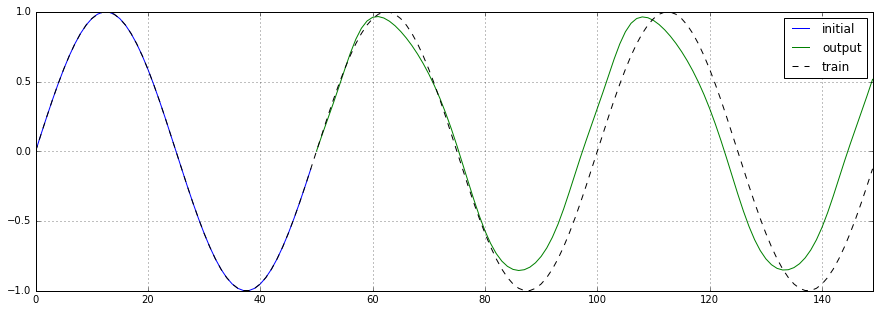

In [7]:
train_df = pd.DataFrame(train[:len(initial) + len(output), 0], columns=["train"])
initial_df = pd.DataFrame(initial, columns=["initial"])
output_df = pd.DataFrame(output, columns=["output"], index=range(len(initial), len(initial) + len(output)))
merged = pd.concat([train_df, initial_df, output_df])
merged.plot(figsize=(15, 5), grid=True, style=["-", "-", "k--"])

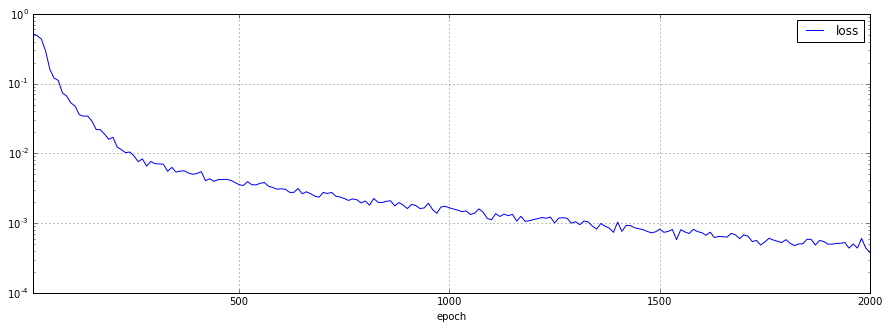

In [8]:
losses_df = pd.DataFrame(losses, columns=["epoch", "loss"])
losses_df.plot(figsize=(15, 5), grid=True, logy=True, x="epoch")